In [25]:
#-*-coding:utf-8-*-

%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import pandas as pd

import torch
from torch.utils.data import DataLoader
import torchvision

import cv2

import copy

import time

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
%matplotlib inline

__ROOT_PATH = os.path.abspath('../../')
sys.path.append(__ROOT_PATH)

matplotlib.rcParams['figure.facecolor'] = 'w'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
#os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

In [27]:
from csgan.loader.beautygan_loader import BeautyganDataset
from csgan.model.cs_basic_model import CSBasicBeautyganModel

In [28]:
#DATA_ROOT = os.path.join(__ROOT_PATH, "data/")
DATA_ROOT = "/data/"
RUN_ROOT = os.path.join(__ROOT_PATH, "runs/")

In [29]:
run_dir = os.path.join(RUN_ROOT, "beautygan_sc_separate/")
os.makedirs(run_dir, exist_ok=True)

# params = {'seed': 2222, 'num_epoch': 200, 'batch_size': 8, 'test_batch_size': 512,
#           'learning_rate': 0.0001, 'scheduler_gamma': 0.98, 'weight_decay': 0.00001,# 'clip_size': 3.,
#           'lambda_identity': 1., 'lambda_cycle': 1., 'lambda_weight_cycle': 1., 'lambda_siamese': 1.,
#           'lambda_content': 0.1, 'lambda_style': 0., 'lambda_content_seg': 0., 'lambda_style_seg': 0., 'lambda_source': 0.01, 'lambda_reference': 0.01,
#           'gamma_content': 1., 'gamma_style': 1., 'gamma_content_seg': 1., 'gamma_style_seg': 1., 'gamma_source': 1., 'gamma_reference': 1.,
#           'scheduler_interval': 1000, 'checkpoint_interval': 10,
#           'validation_interval': 10, 'logging_interval': 10, 'sampling_interval': 100,
#           'stopping_loss': 'loss',
#           'run_dir': run_dir}

params = {'seed': 2222, 'num_epoch': 200, 'batch_size': 8, 'test_batch_size': 512,
          'learning_rate': 0.0001, 'scheduler_gamma': 0.98, 'weight_decay': 0.00001,# 'clip_size': 3.,
          'lambda_identity': 1., 'lambda_cycle': 1., 'lambda_weight_cycle': 1., 'lambda_siamese': 1.,
          'lambda_content': 0.1, 'lambda_style': 0., 'lambda_content_seg': 0., 'lambda_style_seg': 0., 'lambda_source': 0.01, 'lambda_reference': 0.01,
          'gamma_content': 1., 'gamma_style': 1., 'gamma_content_seg': 1., 'gamma_style_seg': 1., 'gamma_source': 1., 'gamma_reference': 1.,
          'scheduler_interval': 1000, 'checkpoint_interval': 10,
          'validation_interval': 10, 'logging_interval': 10, 'sampling_interval': 100,
          'stopping_loss': 'loss',
          'beta1': 0.9, 'beta2': 0.99,
          'run_dir': run_dir}

In [30]:
train_dataset = BeautyganDataset(root=DATA_ROOT, image_size=256, seg_size=64)
print(len(train_dataset))

2718


79


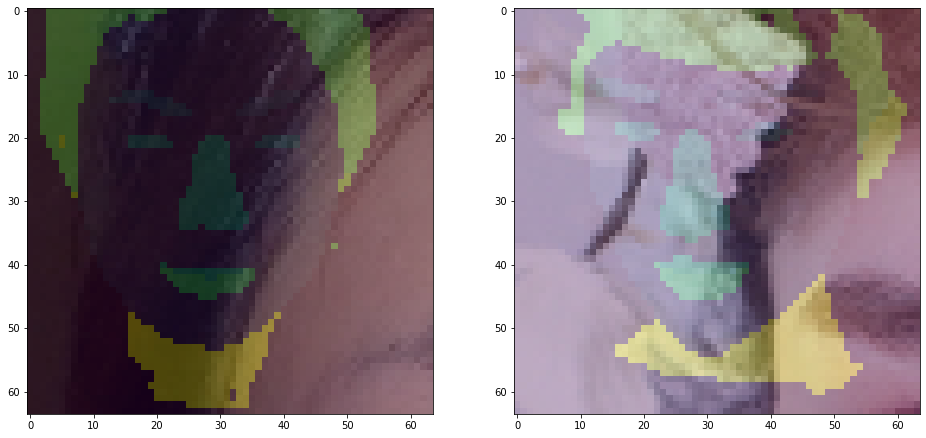

In [31]:
dataset = train_dataset
index = np.random.randint(len(dataset))

print(index)
data = dataset[index]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(data['x1'][:3].numpy().transpose(1, 2, 0))
plt.imshow(data['seg1'].numpy(), alpha=0.3)
ax = fig.add_subplot(1, 2, 2)
plt.imshow(data['x2'][:3].numpy().transpose(1, 2, 0))
plt.imshow(data['seg2'].numpy(), alpha=0.3)
plt.show()

In [32]:
train_loader = DataLoader(train_dataset, params['batch_size'], shuffle=True, drop_last=True)
print(len(train_loader))

339


In [33]:
# 차이점: 이거는 s1, 0 전부 쓴거 (옆에거는 0만씀)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sc_model = CSBasicBeautyganModel(device)
#sc_model.load(os.path.join(run_dir, 'best_model.pth.tar'))
sc_model.train_model(train_loader, params=params)


Learning with learning rate:  0.00010000.

[1/200] 10'th step. [LOSS] 0.484808. [LOSS_IDENTITY] 0.373968. [LOSS_CONTENT] 0.056480. [ACCURACY_CONTENT] 0.500000. [LOSS_SOURCE] 0.002492. [ACCURACY_SOURCE] 0.562500
    Best Step:     10. Elapsed Time: 7.322513 seconds.
[1/200] 20'th step. [LOSS] 0.398086. [LOSS_IDENTITY] 0.307782. [LOSS_CONTENT] 0.038816. [ACCURACY_CONTENT] 0.500000. [LOSS_SOURCE] 0.002423. [ACCURACY_SOURCE] 0.562500
    Best Step:     20. Elapsed Time: 11.784852 seconds.
[1/200] 30'th step. [LOSS] 0.364048. [LOSS_IDENTITY] 0.299974. [LOSS_CONTENT] 0.033100. [ACCURACY_CONTENT] 0.500000. [LOSS_SOURCE] 0.002453. [ACCURACY_SOURCE] 0.500000
    Best Step:     30. Elapsed Time: 16.374460 seconds.
[1/200] 40'th step. [LOSS] 0.305868. [LOSS_IDENTITY] 0.254254. [LOSS_CONTENT] 0.025671. [ACCURACY_CONTENT] 0.500000. [LOSS_SOURCE] 0.002357. [ACCURACY_SOURCE] 0.625000
    Best Step:     40. Elapsed Time: 20.883501 seconds.
[1/200] 50'th step. [LOSS] 0.284062. [LOSS_IDENTITY] 0.241722

In [ ]:
test_dataset = BeautyganDataset(root=DATA_ROOT, image_size=256, seg_size=64)

In [ ]:
test_loader = DataLoader(test_dataset, params['batch_size'], shuffle=True, drop_last=True)

In [24]:
all_input, all_output = sc_model.predict(test_loader)

NameError: name 'test_loader' is not defined

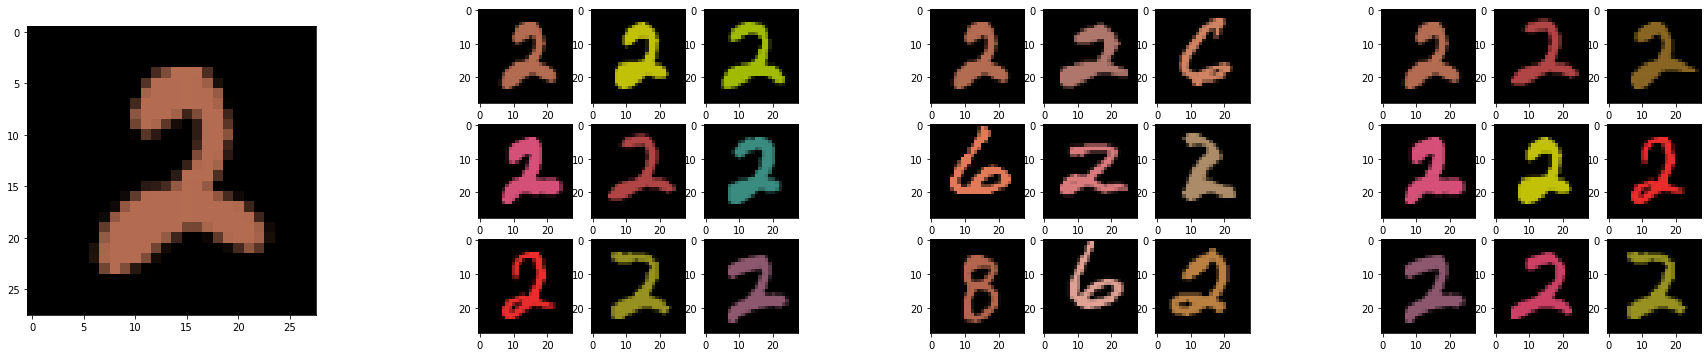

In [14]:
images = all_input['x2'].numpy().transpose(0, 2, 3, 1)
latents = all_output['z2'].numpy()
styles = all_output['s2'].numpy()
contents = all_output['c2'].numpy()

index = np.random.randint(len(images))

fig = plt.figure(figsize=(30, 6))

ax = fig.add_subplot(1, 5, 1)
ax.imshow(images[index])
content_indices = ((contents-contents[index:index+1])**2).mean(axis=1).argsort(axis=0)
style_indices = ((styles-styles[index:index+1])**2).mean(axis=1).argsort(axis=0)
latent_indices = ((latents-latents[index:index+1])**2).mean(axis=1).argsort(axis=0)
for i in range(9):
    ax = fig.add_subplot(3, 15, 15*(i//3)+(i%3)+5)
    ax.imshow(images[content_indices[i]])
for i in range(9):
    ax = fig.add_subplot(3, 15, 15*(i//3)+(i%3)+9)
    ax.imshow(images[style_indices[i]])
for i in range(9):
    ax = fig.add_subplot(3, 15, 15*(i//3)+(i%3)+13)
    ax.imshow(images[latent_indices[i]])

plt.savefig(os.path.join(__ROOT_PATH, "./results/", f"similar_test.png"), dpi=200, bbox_inches='tight')
plt.show()